# Day-8 (Feature Engineering Within EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [6]:
# Power-to-weight ratio
df['power_to_weight'] = df['horsepower'] / df['weight']

# Age of the car
df['car_age'] = 82 - df['model_year']  # dataset is till 1982

# Engine size indicator
df['engine_size_category'] = pd.cut(df['displacement'],
                                    bins=[0,150,300,600],
                                    labels=['Small','Medium','Large'])

#### New columns help uncover deeper trends like how car power, age, and engine size affect mileage.

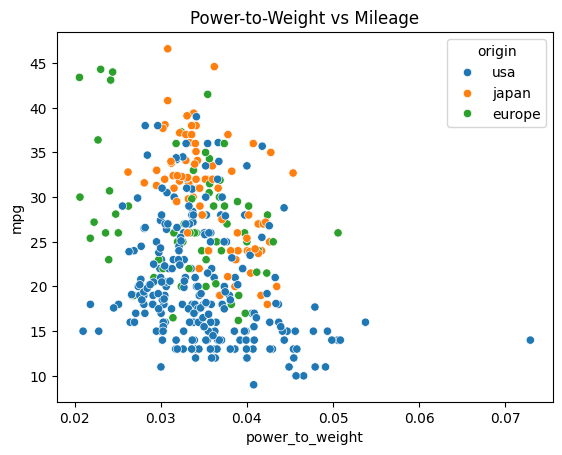

In [7]:
sns.scatterplot(data=df, x='power_to_weight', y='mpg', hue='origin')
plt.title("Power-to-Weight vs Mileage")
plt.show()

#### Observation --> negative correlation- higher power-to-weight -> lower mpg.

In [8]:
# Encoding (Categorical Variable)
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['origin_encoded'] = le.fit_transform(df['origin'])

In [9]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['origin', 'engine_size_category'], drop_first=True)
df_encoded.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,power_to_weight,car_age,origin_encoded,origin_japan,origin_usa,engine_size_category_Medium,engine_size_category_Large
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0.037100,12,2,False,True,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0.044679,12,2,False,True,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0.043655,12,2,False,True,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0.043694,12,2,False,True,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0.040591,12,2,False,True,False,True


In [10]:
# Scaling Numerical Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[['mpg', 'horsepower', 'weight']])
scaled_df = pd.DataFrame(scaled, columns=['mpg_scaled', 'horsepower_scaled', 'weight_scaled'])
df = pd.concat([df, scaled_df], axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,power_to_weight,car_age,engine_size_category,origin_encoded,mpg_scaled,horsepower_scaled,weight_scaled
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.037100,12,Large,2,-0.706439,0.664133,0.630870
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.044679,12,Large,2,-1.090751,1.574594,0.854333
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.043655,12,Large,2,-0.706439,1.184397,0.550470
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.043694,12,Large,2,-0.962647,1.184397,0.546923
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.040591,12,Large,2,-0.834543,0.924265,0.565841


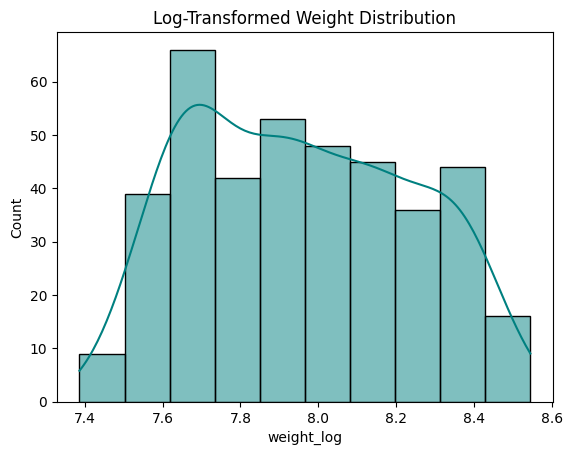

In [11]:
# Log Transformation for Skewed Features
df['weight_log'] = np.log1p(df['weight'])
sns.histplot(df['weight_log'], kde=True, color='teal')
plt.title("Log-Transformed Weight Distribution")
plt.show()

In [12]:
# Handling Rare Categories

# <5% frequency

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare_labels = freq[freq < 0.05].index
    if len(rare_labels) > 0:
        print(f"{col} --> Rare categories: {list(rare_labels)}")

name --> Rare categories: ['ford pinto', 'ford maverick', 'amc matador', 'toyota corolla', 'amc hornet', 'peugeot 504', 'toyota corona', 'amc gremlin', 'chevrolet chevette', 'chevrolet impala', 'dodge colt', 'ford gran torino', 'pontiac catalina', 'volkswagen dasher', 'plymouth duster', 'chevrolet caprice classic', 'honda civic', 'plymouth fury iii', 'chevrolet nova', 'chevrolet vega', 'ford galaxie 500', 'chevrolet citation', 'datsun pl510', 'plymouth reliant', 'vw rabbit', 'buick skylark', 'chevrolet monte carlo landau', 'ford country squire (sw)', 'toyota corolla 1200', 'opel 1900', 'subaru dl', 'oldsmobile cutlass salon brougham', 'pontiac phoenix', 'amc concord', 'dodge aspen', 'datsun 210', 'honda accord', 'mazda 626', 'buick century', 'volkswagen rabbit', 'saab 99le', 'toyota mark ii', 'chevrolet chevelle malibu classic', 'amc matador (sw)', 'datsun 710', 'honda civic cvcc', 'subaru', 'audi 100ls', 'chevrolet malibu', 'ford ltd', 'fiat 128', 'plymouth valiant', 'opel manta', 'fo

In [13]:
# Replace rare labels

for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare_labels = freq[freq < 0.05].index
    df[col] = df[col].apply(lambda x: 'Rare' if x in rare_labels else x)

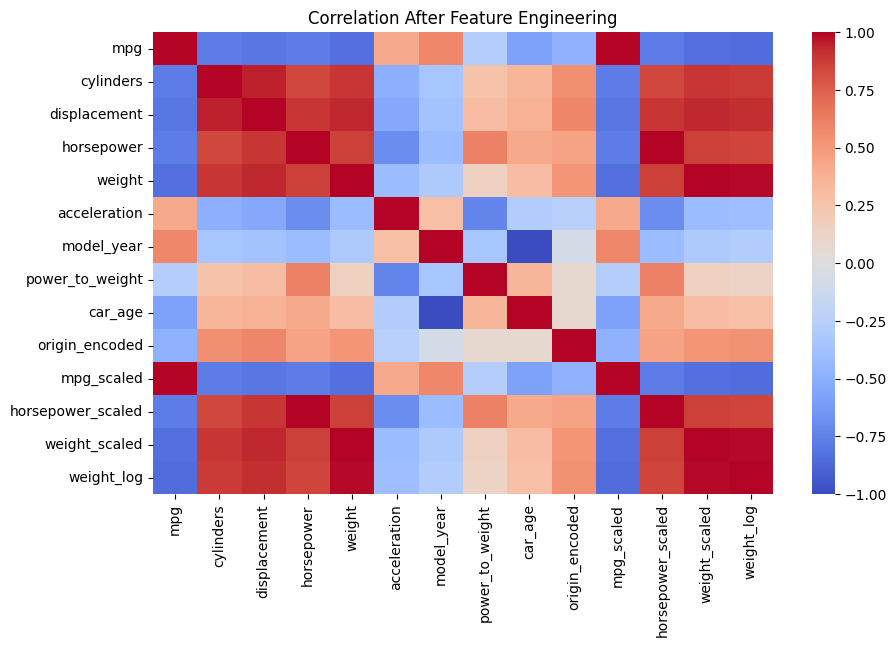

In [14]:
# Correlation After Feature Engineering

corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation After Feature Engineering")
plt.show()